In [1]:
'''
Things to do: 

>Visualize
    >> examine the distribution of key variables: {Numerical: histo, box, density -find means and outliers; 
                                            Categorical: bar chart for the frequency of each value}
    >> pairwise scatter plots 

>DQ issues:
    >> Finding Missing values
    >> Find outliers
    >> Find inconsistencies- see the cardinality and value count of for each, to find inconsistencys

* Then Handle DQ issues
'''

'\nThings to do: \n\n>Visualize\n    >> examine the distribution of key variables: {Numerical: histo, box, density -find means and outliers; \n                                            Categorical: bar chart for the frequency of each value}\n    >> pairwise scatter plots \n\n>DQ issues:\n    >> Finding Missing values\n    >> Find outliers\n    >> Find inconsistencies- see the cardinality and value count of for each, to find inconsistencys\n\n* Then Handle DQ issues\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

# Part 1
The initial phase of Exploratory Data Analysis (EDA) involves a comprehensive understanding of the dataset that has been presented to us. This crucial step aims to identify typical values, patterns, and key characteristics within the data. This step is really important because it helps us get a good sense of what's usual in the data. By doing this, we can spot and fix anything out of place that could potentially skew our later analysis..

In [4]:
data.info()
data.describe()
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

The dataset is a comprehensive collection of data related to house sales, encompassing a variety of features that describe the physical attributes, condition, and amenities of residential properties. It includes detailed information such as the type and quality, the size and layout of the house, as well as the year of construction and any renovations. Additionally, the dataset captures aspects like the neighborhood, utilities, and specific details like the presence of a pool or fireplace.

A breakdown of 15 or 80 features:  
**ID:** A unique identifier for each house.  
**MSSubClass** Identifies the type of dwelling involved in the sale.     
**MSZoning** The general zoning classification (like residential, commercial)  
**LotFrontage** Linear feet of street connected to the property  
**LotArea**  Lot size in square feet.  
**Street** Type of road access to the property.  
**Alley** Type of alley access to the property.  
**LotShape** General shape of the property.  
**LandContour** Flatness of the property.  
**Utilities** Type of utilities available  
**LotConfig** Lot configuration (whether the lot is inside, corner, etc.)  
**LandSlope** Slope of the property  
**Neighborhood** Physical locations within Ames city limits.  
**BldgType** Type of dwelling.  
**HouseStyle** Style of dwelling  
**...**  
**SalePrice** (The Target Variable) - represents the sale price of each house.

***
## Finding Missing Value

There are 3 distinct types of data types:
43 columns are ***categorical variables***, 35 columns are ***quatitative discrete variables***, and 3 columns are ***quatitative continuous variables*** as float points. 

In [5]:
#There are 1460 total records for each feature 
# we need to find how many records have missing values and what proportion is null for each feature.

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

#print(data.isna().sum())
data.isna().sum()/len(data)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

# Data Understanding 
## Univariate, Bivariate, Multivariate Analysis

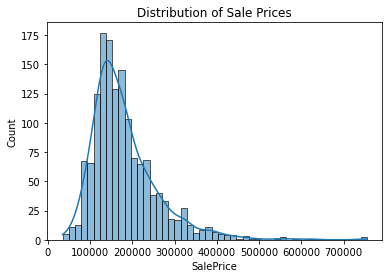

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
# Univariate - By implementing a histogram, Boxplot, Bar chart
# we will be able to see the distributions of a single variable. 
# Since SalesPrice is our target variable, we will look into the distibution
plt.figure()
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

sale_price_stats = data['SalePrice'].describe()
print(sale_price_stats)

# COME BACK AND INTERPRET 

Since there are 80 potential features, we need to analyze which are having the greatest influence on our target variable.  
  
**First:**    (come back to this)  
We should view the distributions of the variables that intuitatively know affect the price of a house e.g. SQFT, Neighborhood, # of bedrooms, LotArea, YearBuilt. 
  
**Second:**   
To explore the other variables, we can begin with those variables with the most variance as high variance can mean a wide variety of data and more interesting insights. We similarly can look at the cardinality and frequency in categorical variables.
**come back to cardinally**
  
**Lastly:**   
Those with the highest correlation > correlation matrix + pairwise plots  

In [7]:
numerical_variances = data.select_dtypes(include=['int64', 'float64']).var()
high_variance_vars = numerical_variances.sort_values(ascending=False).head(13)
print(f'The top 13 quantitative variabls: \n{high_variance_vars}')


category_counts = data.select_dtypes(include=['object']).apply(pd.Series.value_counts)
imbalance_in_categories = category_counts.max().sort_values(ascending=False).head(90)
print(f'\n Qualitative variables with count of most frequent category: \n {imbalance_in_categories} count of ')

null_counts_categorical = data.select_dtypes(include=['object']).isnull().sum()
print(f' \nSum of null values: \n{null_counts_categorical}')




The top 13 quantitative variabls: 
SalePrice      6.311111e+09
LotArea        9.962565e+07
GrLivArea      2.761296e+05
MiscVal        2.461381e+05
BsmtFinSF1     2.080255e+05
BsmtUnfSF      1.952464e+05
TotalBsmtSF    1.924624e+05
2ndFlrSF       1.905571e+05
Id             1.777550e+05
1stFlrSF       1.494501e+05
GarageArea     4.571251e+04
MasVnrArea     3.278497e+04
BsmtFinSF2     2.602391e+04
dtype: float64

 Qualitative variables with count of most frequent category: 
 Utilities        1459.0
Street           1454.0
Condition2       1445.0
RoofMatl         1434.0
Heating          1428.0
LandSlope        1382.0
CentralAir       1365.0
Functional       1360.0
PavedDrive       1340.0
Electrical       1334.0
GarageCond       1326.0
LandContour      1311.0
GarageQual       1311.0
BsmtCond         1311.0
ExterCond        1282.0
SaleType         1267.0
Condition1       1260.0
BsmtFinType2     1256.0
BldgType         1220.0
SaleCondition    1198.0
MSZoning         1151.0
RoofStyle        1

**Given that there are 1460 records, this shows us the 90% of the records have the following: 
Public utilities, paved streets, typical conditions for a residential area, Roof made of compositie shingle, Gas forced warm air furnace, on a gentle slope, Central air, Typical Functionality of a home (no deductions), paved driveway, standard Circuit Breakers & Romex, and Typical/average garage condition.**

This is important to note as we are building a model to predict prices, it will be biased toward these categories. 

 We will analyze the categorical data if it isn't part of the more 90% variables and those variables 
that are missing more than 70% of its values therefore we are left with this list of:

Therefore from this analysis we will do a preliminary analysis on these variables:  
1.LotArea , Neighborhood, # of bedrooms, YearBuilt, OverallCond   
2. numerical_columns = [ 'GrLivArea', 'MiscVal', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF2','OverallQual','SalePrice']   
3. categorical_columns = [
    "MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood", 
    "Condition1", "BldgType", "HouseStyle", "RoofStyle", "Exterior1st", 
    "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "HeatingQC", "KitchenQual", "FireplaceQu", "GarageType", "GarageFinish", 
    "GarageQual"]   

# Quantitative Variables

In [8]:
'''
numerical_columns = [ 'GrLivArea', 'MiscVal', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF2', 'LotArea' ,'BedroomAbvGr']

categorical_columns = [
    "MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood", 
    "Condition1", "BldgType", "HouseStyle", "RoofStyle", "Exterior1st", 
    "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "HeatingQC", "KitchenQual", "FireplaceQu", "GarageType", "GarageFinish", 
    "GarageQual",'Neighborhood','YearBuilt', 'OverallCond']
'''

#Correlation: We will look at the correlation between all the numerical variables. 

'''
corr_matrix = data[[ 'GrLivArea', 'MiscVal', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '2ndFlrSF', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF2', 
                     'LotArea', 'BedroomAbvGr','OverallQual' ,'SalePrice']].corr()
'''

corr_matrix = data.corr()
correlations_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

top_7_correlations = correlations_with_saleprice.head(7) # I saw there were no strong correlations in the the negative direction
print(top_7_correlations)

#The only other numerical variable add for deeper analysis is "GarageCars"

corr_matrix = data[[ 'GrLivArea', 'MiscVal', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '2ndFlrSF', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'BsmtFinSF2', 
                     'LotArea', 'BedroomAbvGr','OverallQual' ,"GarageCars",'SalePrice']].corr()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


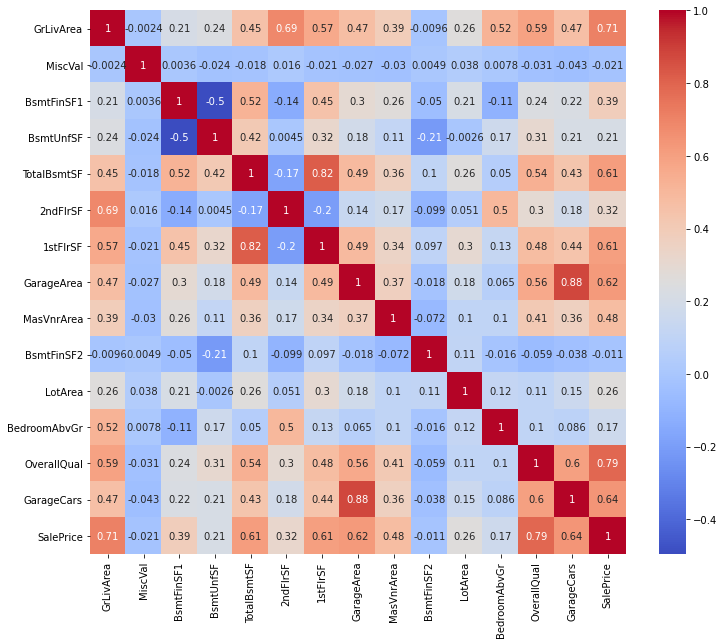

In [9]:
# Plotting a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True )
plt.show()

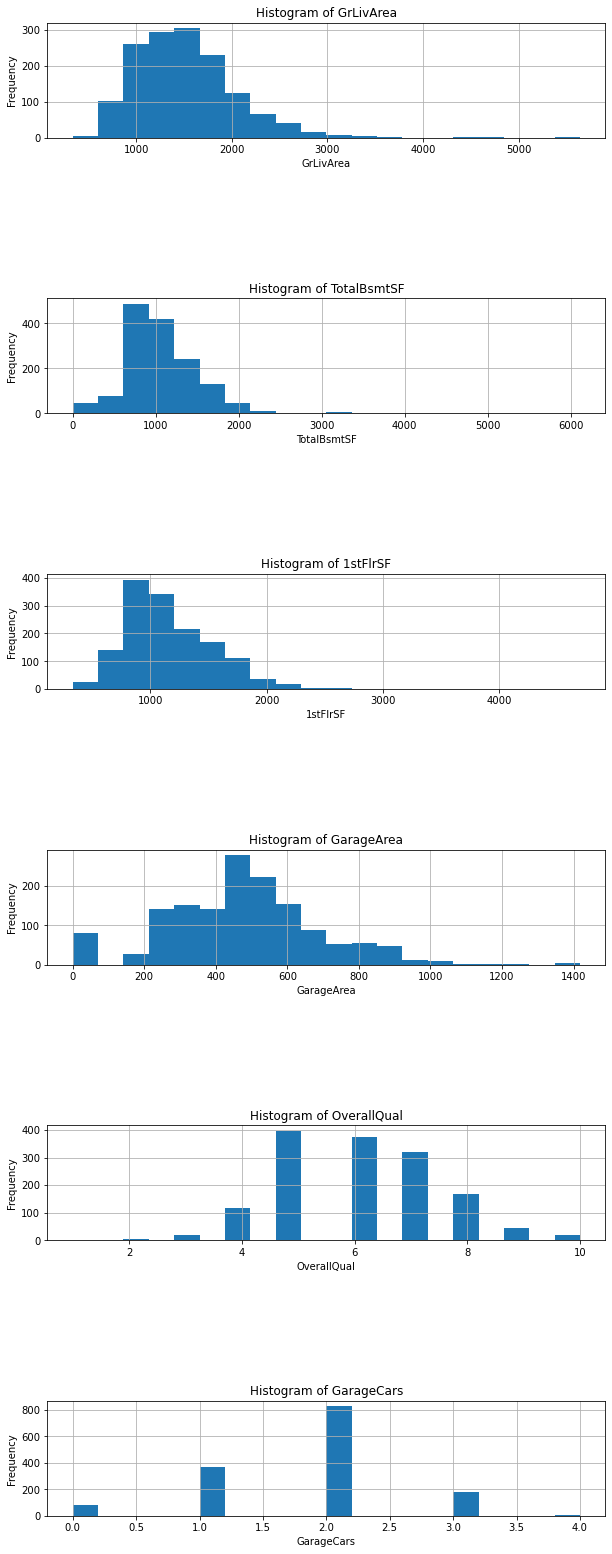

In [10]:
# Histogram

# Picking the highest correlated values visualise:
    
columns_to_plot = [ 'GrLivArea', 'TotalBsmtSF','1stFlrSF', 'GarageArea','OverallQual','GarageCars']

# Setting up the plotting area
plt.figure(figsize=(10, 5 * len(columns_to_plot))) 

# Loop through the columns and create a histogram for each
for i, column in enumerate(columns_to_plot):
    # Histogram
    plt.subplot(len(columns_to_plot) * 2, 1, 2 * i + 1)
    data[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.show()

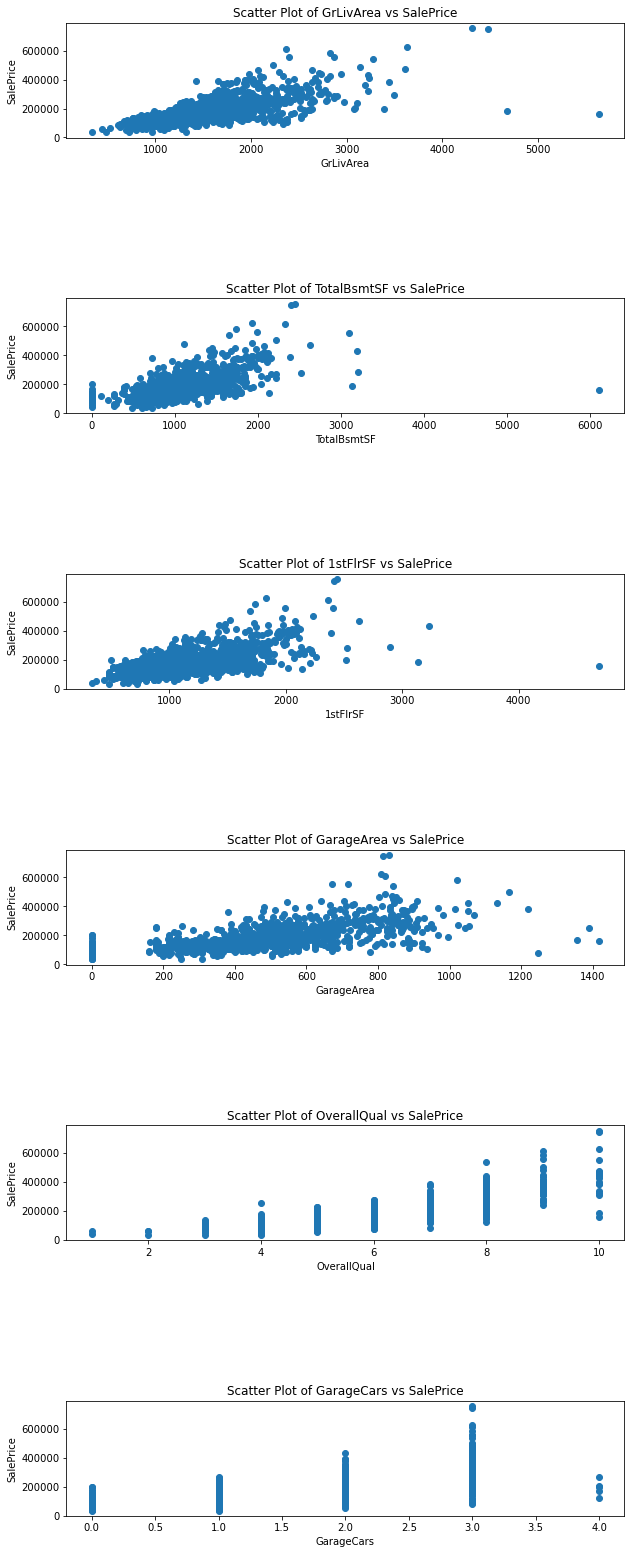

In [11]:
# Scatterplot [Bivariate]


# Setting up the plotting area
plt.figure(figsize=(10, 5 * len(columns_to_plot))) 

# Loop through the columns and create a SCATTERPLOT for each
for i, column in enumerate(columns_to_plot):
    # Scatter plot
    plt.subplot(len(columns_to_plot) * 2, 1, 2 * i + 2)
    plt.scatter(data[column], data['SalePrice'])
    plt.title(f'Scatter Plot of {column} vs SalePrice')
    plt.xlabel(column)
    plt.ylabel('SalePrice')


plt.show()

# !!! Come back and describe: Form, strength, direction, and outlier !!!!


Descriptive Statistics for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Descriptive Statistics for TotalBsmtSF:
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Descriptive Statistics for 1stFlrSF:
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

Descriptive Statistics for GarageArea:
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

Descriptive Statistics for OverallQual:

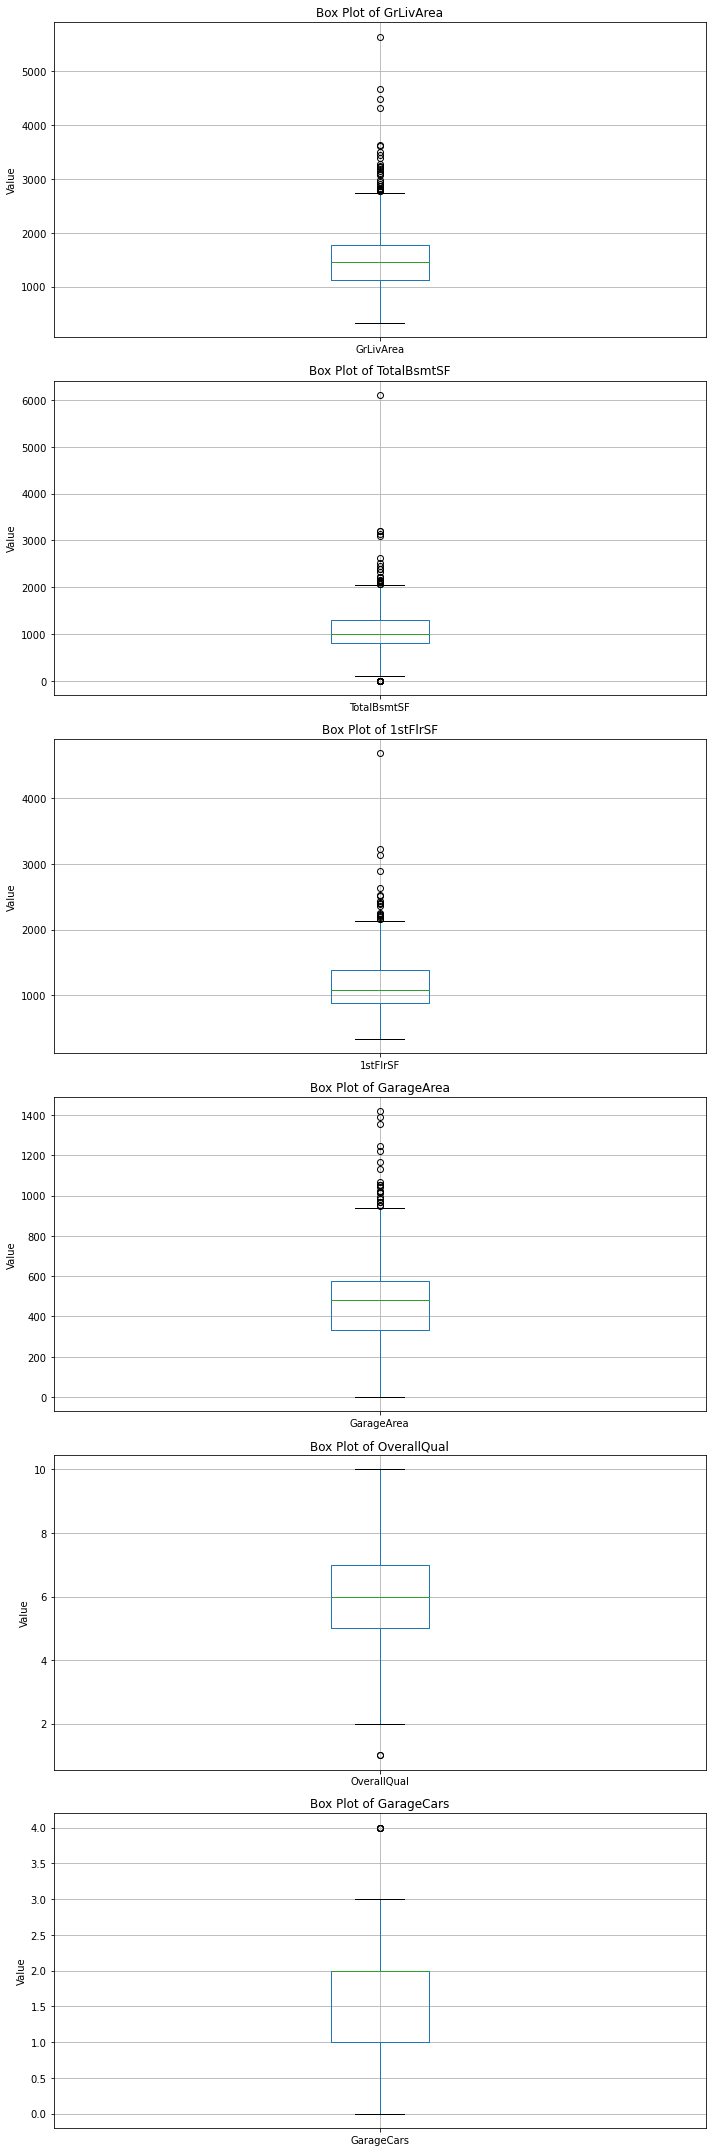

In [12]:
# Boxplot

plt.figure(figsize=(10, 5 * len(columns_to_plot)))

# Loop through the columns and create a box plot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)  # Creates a subplot for each box plot
    data.boxplot(column)  # Creates a box plot for the specified column
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    
    # Print descriptive statistics
    print(f'\nDescriptive Statistics for {column}:')
    print(data[column].describe())

plt.tight_layout()
plt.show()

In [13]:

#numerical_variable = data.select_dtypes(include=['int64', 'float64'])
numerical_variable = data[[ 'GrLivArea', 'TotalBsmtSF','1stFlrSF', 'GarageArea','OverallQual','GarageCars','SalePrice']
]


# Calculate IQR for each column
Q1 = numerical_variable.quantile(0.25)
Q3 = numerical_variable.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = ((numerical_variable < (Q1 - 1.5 * IQR)) | (numerical_variable > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column
outlier_counts = outliers.sum()

print(f'Number of outliers in each feature: \n{outlier_counts}')

Number of outliers in each feature: 
GrLivArea      31
TotalBsmtSF    61
1stFlrSF       20
GarageArea     21
OverallQual     2
GarageCars      5
SalePrice      61
dtype: int64


# Categorical

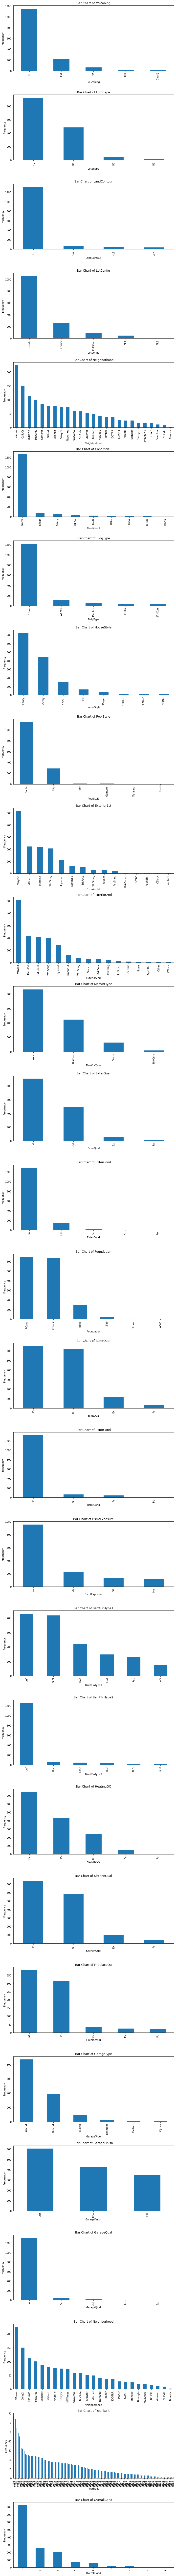

In [14]:
categorical_columns = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood", 
    "Condition1", "BldgType", "HouseStyle", "RoofStyle", "Exterior1st", 
    "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "HeatingQC", "KitchenQual", "FireplaceQu", "GarageType", "GarageFinish", 
    "GarageQual",'Neighborhood','YearBuilt', 'OverallCond'] 

# Set up the plotting area
plt.figure(figsize=(10, 5 * len(categorical_columns)))

# Loop through the categorical columns and create a bar chart for each
for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)  # Creates a subplot for each bar chart
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
####
### come back and interpret

In [15]:
Things to do: 

>Visualize
    >> examine the distribution of key variables: {Numerical: histo, box, density -find means and outliers; 
                                            Categorical: bar chart for the frequency of each value}
    >> pairwise scatter plots 

>DQ issues:
    >> Find outliers
    >> Find inconsistencies- see the cardinality and value count of for each, to find inconsistencys

* Then Handle DQ issues
'''

SyntaxError: invalid syntax (<ipython-input-15-1bed42730f78>, line 1)

# Part 2

The next part of the EDA phase is to handle the data quality issues discovered in part 1. The missing values, outliers, and 

# Handing Missing Values

First we can handle the columns who are missing more than 70% of their values. 

In [18]:
# Creating a copy of the original DataFrame to modify
data_cleaned = data.copy()

# Calculate the percentage of missing values
missing_percentage = data_cleaned.isnull().mean() * 100
print(f'Pre modifications: \n{missing_percentage}')

# Dropping rows with low missing values in specific columns
data_cleaned.dropna(subset=['Electrical', 'MasVnrType', 'MasVnrArea'], inplace=True)

# Convert 'LotFrontage' to numeric and impute missing values
data_cleaned['LotFrontage'] = pd.to_numeric(data_cleaned['LotFrontage'], errors='coerce')
data_cleaned['LotFrontage'].fillna(data_cleaned['LotFrontage'].mean(), inplace=True)

# Impute missing values for basement related columns
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    data_cleaned.loc[:, col] = data_cleaned.loc[:, col].fillna('No Basement')

# Impute missing values for garage related columns
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    data_cleaned.loc[:, col] = data_cleaned.loc[:, col].fillna('No Garage')

# Impute missing values for 'FireplaceQu', Alley', Pool, Fence, and misc Features
data_cleaned.loc[:, 'Alley'] = data_cleaned.loc[:, 'Alley'].fillna('No Alley Access')
data_cleaned.loc[:, 'PoolQC'] = data_cleaned.loc[:, 'PoolQC'].fillna('No Pool')
data_cleaned.loc[:, 'Fence'] = data_cleaned.loc[:, 'Fence'].fillna('No Fence')
data_cleaned.loc[:, 'MiscFeature'] = data_cleaned.loc[:, 'MiscFeature'].fillna('None')
data_cleaned.loc[:, 'FireplaceQu'] = data_cleaned.loc[:, 'FireplaceQu'].fillna('No Fireplace')

missing_percentage = data_cleaned.isnull().mean() * 100
print(f'\nPost modifications: \n{missing_percentage}')

Pre modifications: 
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinS

# Standardize  >  # found the outliers, return to drop them
By standardizing the numeric columns of data_cleaned we force them to have a mean of 0 and a standard deviation of 1. This will easily show us the outlier values in each column. 
# Normalization
Data Normalization involves adjusting values measured on different scales to a common scale. The ".apply(zscore)" equals the difference between the current value and the average value/standard deviation. 

In [19]:
from scipy.stats import zscore

numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(zscore)

outlier_counts = {}

# Counting the number of outliers in each column
for column in numeric_columns:
    outliers = data_cleaned[(data_cleaned[column] < -3) | (data_cleaned[column] > 3)]
    outlier_counts[column] = len(outliers)

# Printing the count of outliers for each column
for column, count in outlier_counts.items():
    print(f"{column}: {count}")


Id: 0
MSSubClass: 30
LotFrontage: 16
LotArea: 13
OverallQual: 2
OverallCond: 28
YearBuilt: 6
YearRemodAdd: 0
MasVnrArea: 32
BsmtFinSF1: 7
BsmtFinSF2: 48
BsmtUnfSF: 11
TotalBsmtSF: 10
1stFlrSF: 11
2ndFlrSF: 4
LowQualFinSF: 20
GrLivArea: 16
BsmtFullBath: 16
BsmtHalfBath: 82
FullBath: 0
HalfBath: 12
BedroomAbvGr: 14
KitchenAbvGr: 67
TotRmsAbvGrd: 12
Fireplaces: 5
GarageCars: 0
GarageArea: 7
WoodDeckSF: 22
OpenPorchSF: 27
EnclosedPorch: 51
3SsnPorch: 23
ScreenPorch: 55
PoolArea: 7
MiscVal: 8
MoSold: 0
YrSold: 0
SalePrice: 21


## does any of our data need to be formatted or binned? 

- https://towardsdatascience.com/data-processing-with-python-pandas-part-2-data-formatting-710c2eafa426?source=your_stories_page
- https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950?source=your_stories_page

# Finding/Dropping Duplicates

In [20]:
duplicate_rows_without_ID =  data_cleaned.duplicated(subset = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
)
num_duplicate_rows = duplicate_rows_without_ID.sum()
# Printing the duplicate rows
print(f"There are {num_duplicate_rows} duplicate rows: ")
print(duplicate_rows_without_ID)


There are 0 duplicate rows: 
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69   

# Part 3
Collinearity  
https://medium.com/@ogre51/understanding-variance-inflation-factor-vif-in-regression-analysis-detecting-and-addressing-357001dc784c

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only numerical features for VIF calculation
numerical_features = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))


          Feature       VIF
14       2ndFlrSF       inf
9      BsmtFinSF1       inf
16      GrLivArea       inf
15   LowQualFinSF       inf
13       1stFlrSF       inf
12    TotalBsmtSF       inf
11      BsmtUnfSF       inf
10     BsmtFinSF2       inf
25     GarageCars  5.543263
36      SalePrice  5.348172
26     GarageArea  5.226312
23   TotRmsAbvGrd  4.936257
6       YearBuilt  4.159094
4     OverallQual  3.740184
19       FullBath  2.918674
21   BedroomAbvGr  2.368005
7    YearRemodAdd  2.243821
17   BsmtFullBath  2.230506
20       HalfBath  2.168531
1      MSSubClass  1.709357
22   KitchenAbvGr  1.600228
5     OverallCond  1.581793
2     LotFrontage  1.573668
24     Fireplaces  1.572745
8      MasVnrArea  1.429600
29  EnclosedPorch  1.282779
3         LotArea  1.269407
27     WoodDeckSF  1.219910
28    OpenPorchSF  1.213308
18   BsmtHalfBath  1.151516
31    ScreenPorch  1.118153
32       PoolArea  1.110838
35         YrSold  1.052602
34         MoSold  1.051365
30      3SsnPorch  1

/Users/xiomara/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
